<a href="https://colab.research.google.com/github/jeraldflowers/Breast-Cancer-Wisconsin-data/blob/main/Final_project_binomial_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Wisconsin (Diagnostic) Data Set

Predict whether the cancer is benign or malignant



## Import Libraries

In [16]:
import pandas as pd
import numpy as np

## Data Load

In [17]:
df_data = pd.read_csv('/content/data.csv')

In [18]:
df_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We notice that in our data set there is a column that has no data, we will eliminate it to work more comfortably.

## Delete Unnamed: 32

In [21]:
df_data.drop('Unnamed: 32', axis=1, inplace=True)

In [22]:
df_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We'll also remove 'id' as it won't help us much in our development.

## Delete id

In [23]:
df_data.drop('id', axis=1, inplace=True)

## Convert to target variable numeric

In [24]:
df_data['diagnosis'].replace(to_replace="B", value=1, inplace=True)
df_data['diagnosis'].replace(to_replace="M", value=0, inplace=True)

In [25]:
df_data['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [26]:
df_data_processing = df_data.copy()

We make a copy so as not to damage our original dataset.

## Correlation Analysis

In [27]:
import matplotlib.pyplot as plt

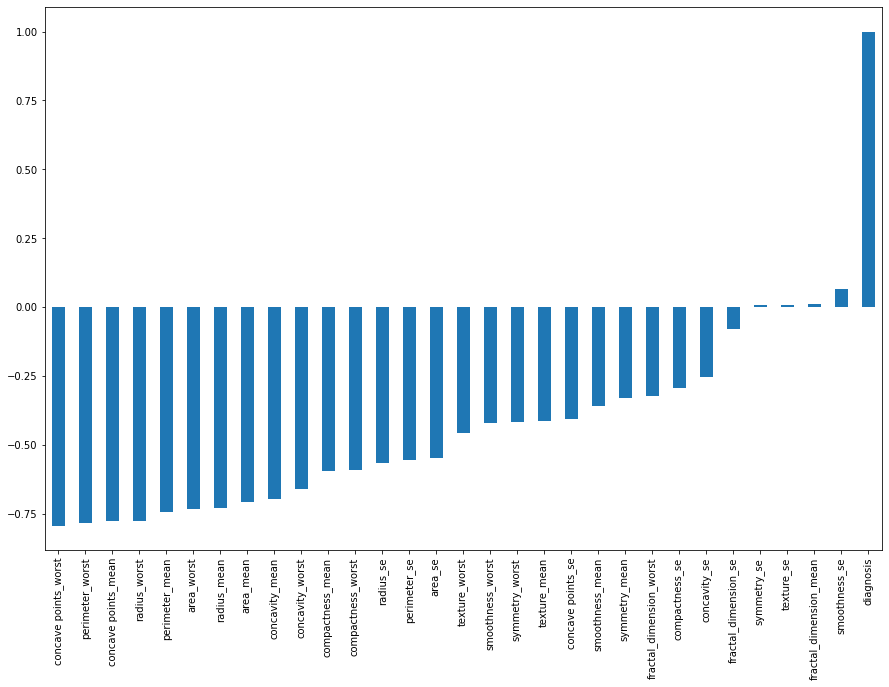

In [28]:
fig = plt.figure(figsize=(15,10))
df_data_processing.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

We observe that the vast majority of variables are inversely correlated.

## Data Scalability

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

In [31]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [32]:
df_data_processing_scaled.columns = df_data_processing.columns

In [33]:
df_data_processing_scaled.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Training of Binomial Logistic Regression model


In [38]:
X = df_data_processing_scaled.drop('diagnosis', axis=1)
y = df_data_processing_scaled['diagnosis'].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [41]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.9766081871345029


The result was 97.6% accuracy. We'll see if it's a good result.

## Evaluation Model

In [42]:
model.predict_log_proba(X_test)

array([[-1.68366311e+00, -2.05417242e-01],
       [-3.93150403e-02, -3.25574125e+00],
       [-1.90949955e-01, -1.74970009e+00],
       [-2.73932254e+00, -6.67961132e-02],
       [-3.70616958e+00, -2.48783786e-02],
       [-1.02527803e-04, -9.18542781e+00],
       [-9.48896316e-04, -6.96068543e+00],
       [-3.54088955e-01, -1.21003291e+00],
       [-6.99330286e-01, -6.87002071e-01],
       [-3.12888627e+00, -4.47531638e-02],
       [-2.06476684e+00, -1.35645469e-01],
       [-3.09673711e-01, -1.32308038e+00],
       [-2.44562470e+00, -9.06601789e-02],
       [-3.93693328e-01, -1.12257991e+00],
       [-3.04825597e+00, -4.86038529e-02],
       [-2.34373654e-02, -3.76511951e+00],
       [-2.80788922e+00, -6.22288771e-02],
       [-4.77324008e+00, -8.48887631e-03],
       [-6.30732051e+00, -1.82457469e-03],
       [-6.72618946e-03, -5.00510771e+00],
       [-1.28311480e+00, -3.24584837e-01],
       [-2.49318130e+00, -8.62625200e-02],
       [-6.49708573e-04, -7.33931148e+00],
       [-4.

In [43]:
model.coef_

array([[-1.64007217, -1.46893324, -1.60642229, -1.40205492, -0.63380239,
        -0.334529  , -1.33551108, -2.03333012, -0.41711154,  0.84752298,
        -1.12484985, -0.0685475 , -0.84732831, -0.73961645, -0.00911603,
         0.49938183,  0.18313026, -0.29647412,  0.2322643 ,  0.59318976,
        -2.06103544, -2.08993358, -1.86669948, -1.48502344, -1.31045546,
        -0.78141258, -1.4011101 , -2.44998273, -1.29491442, -0.22237539]])

These data indicate the importance of the different features that I am using to make the prediction. Negative results are very important for the prediction when it is zero.

In [44]:
model.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

AxesSubplot(0.125,0.125;0.775x0.755)


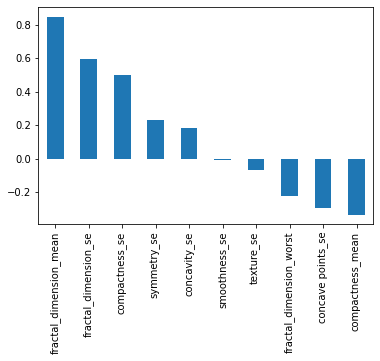

In [45]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Here we observe that for the positive prediction we find fractal_dimension_mean, fractal_dimension_se, compactness_se.

AxesSubplot(0.125,0.125;0.775x0.755)


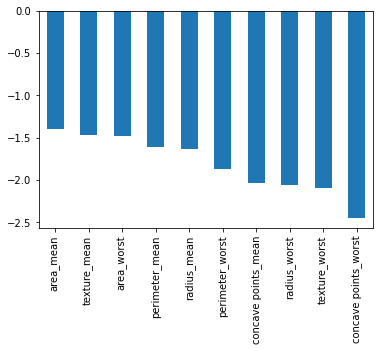

In [46]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

For the negative prediction we find concave_points_worst, texture_worst, radius_worst, etc.

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

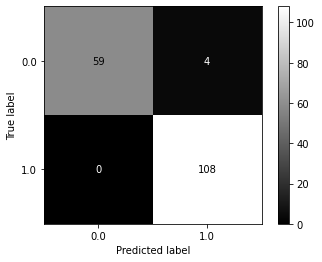

In [48]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

Here we can understand much better the prediction.